### Pandas

Pandas is a python package for importing and working with tabular data,  such as spreadsheet tables

It provides for a dataframe style interface,  very similar to data frames in R

Pandas is using NumPy matrices "underneath" the Pandas structures,  and it is easy to "extract" NumPy matrices from a Pandas
dataframe.   Many functions in sklearn and other packages will accept either Pandas data frames or NumPy matrices as inputs.

Pandas allows for different types of data per column, as opposed by the requirement in NumPy that the matrices be homogeneous.

Pandas has a massive number of built in functions,  that allow for vectorized operations on the DataFrame,  plus a bunch of visualization tools built into it.

Pandas does have some quirks in how you handle accessing and slicing the data, it doesn't use the standard square bracket approach   df[1,2] does not work,  watch for that


# Sources of this material

Chapter 5 of "Python for Data Analysis"- Wes McKinney

    https://learning.oreilly.com/library/view/python-for-data/9781491957653/ch05.html
    
The Pandas website is at

    https://pandas.pydata.org/

    
    

# Panda Series

1-D array like objects in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
# creating a series from a list

#lists have indices and objects

my_obj=pd.Series([4,7,-9,2])

In [3]:
my_obj

0    4
1    7
2   -9
3    2
dtype: int64

In [4]:
my_obj.values

array([ 4,  7, -9,  2])

In [5]:
# this is the index to this obj

my_obj.index

RangeIndex(start=0, stop=4, step=1)

Question- what is a RangeIndex??   

In [6]:
# we can specify the index when creating the series

my_series2=pd.Series([-1,2,3,11],index=['a','b','c','d'])

# we can then select values with the index- note this as a difference from a numpy array

my_series2['b']

2

A series is sort of like a fixed length dictionary,  it is easy to create a series from a dictionary

In [7]:
s_dict={"Ohio":2,"Pennsylvania":11,"Texas":311}

my_series3=pd.Series(s_dict)

my_series3

Ohio              2
Pennsylvania     11
Texas           311
dtype: int64

Series automatically align the indexes when you do operations with them,  kind like a join

In [9]:

s_dict2={"Ohio":8,"Pennsylvania":9,"New York":89,"Texas":10}

my_series4=pd.Series(s_dict2)

my_series3+my_series4

#note the insertion of NaN when there is no matching entry,   output is also sorted by index

New York          NaN
Ohio             10.0
Pennsylvania     20.0
Texas           321.0
dtype: float64

In [10]:
# detecting the null entry

out_series=my_series3+my_series4

out_series.isnull()

New York         True
Ohio            False
Pennsylvania    False
Texas           False
dtype: bool

The interesting feature of Pandas Series is that the can be date indexed,  so that the series is representing a time series
in this form, there are a whole bunch of member functions for working with the data as a time series.

See

    https://pandas.pydata.org/docs/reference/series.html

We'll see about coming back to time series analysis a bit later if I can locate a good discussion of how Pandas series are used
in this approach.  They seem to be more commonly found as a component of pandas dataframes.


    https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

# DataFrames in Pandas

Pandas has dataframes,   each column of a data frame is a Pandas series,  these are the two basic storage forms in Pandas

We can move data into Pandas data frames in a number of ways

-manual entry

-importing CSV files

-pulling data from databases or from website APIs

The R data type "Factor" doesn't exist in Pandas (sadly)- you wind up using either strings or integers as factor-like
variables-  you wind up using what is called either integer coding of categories, or "one-hot" encoding,  more on that later

# Manually entering data into a dataframe

In [11]:
# inserting variables into a data frame
a=np.array([1,2,3,4])
b=["Hey","Hey","My","My"]
c=(1.2, 2.1, 1.3, -2.0)

In [ ]:
# use one or more cells to figure out what type of objects a, b and c are,  also what type of data is in each-  show this
# work in this cell

# when looking at examples,  always, always be aware of what data types are in use







In [12]:
# Manually entering data into a dataframe
# insert into a data frame
# note that the data here is forced into the form of a dictionary, with the variable names in quotes

stuff_df=pd.DataFrame({'x':a,'y':b,'z':c})

stuff_df

,x,y,z
0,1,Hey,1.2
1,2,Hey,2.1
2,3,My,1.3
3,4,My,-2.0


In [20]:
# reading a csv file
#we will look at the standard red-wine data set
infile = "/winequality-red.csv"

# infile="C:\\Users\\hdavi\\Dropbox\\Data_Analytics\\DAT511_Data_Cleaning\\Lectures_Fall_2018\\Example_data\\UCI_wine_data\\winequality-red.csv"

# notice here that a regex string specifier is used in the pd.read_csv() funtion here "\;|\," to indicate that the separator
# (or delimiter) being used is
# ";" or ",",   the escape code \ is uses so that : and , are intrepeted as charactoers

# The red wine set used here is labeled as a csv is not really comma delimited (sigh),   it is ; delimited

# sep="\;" would have worked fine here,   I used the regex expression to show how to allow for two different delimiters.

#  there is also pd.read_table available,  which reads a range of formats

redwine_df=pd.read_csv(infile, sep="\;|\,")


# we have an available member function head to let us look at the data

redwine_df.head(4)


<ipython-input-20-3328ddad3f46>:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  redwine_df=pd.read_csv(infile, sep="\;|\,")


,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [50]:
#API fetch

#this is a data frame download from the Open Data Buffalo repository at
#https://data.buffalony.gov/

# in this case, thei s a copy of the City of Buffalo Public Art Inventory
# note this just makes use of pd.read_csv again with the url from the data set,  which I found on Open Data Buffalo

url="https://data.buffalony.gov/resource/6xz2-syui.csv"

df_art=pd.read_csv(url)

#make sure the data frome has no white space in the column names- this causes odd problems later

df_art.columns = df_art.columns.str.strip()

In [22]:
df_art.head()

,title,category,type,medium,frame,photo_url_link,artist,contractor,founder,architect,...,base_diameter_in,plaque_inscription,site,street_address,city,zip_code,state,latitude,longitude,geocoded_column
0,SOLE PARK,SCULPTURE,RELIEF,STONE,False,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,NaN,NaN,PAT SOLE PARK,BUSTI AVE & NIAGARA ST,BUFFALO,14213,NY,42.907321,-78.899787,"(42.907321, -78.899787)"
1,BUFFALO STREET MAP,GRAPHIC ARTS,MAP,PARCHMENT,True,UNKNOWN,SMITH BROTHERS COMPANY,NaN,NaN,NaN,...,NaN,NaN,502 CITY HALL,65 NIAGARA SQUARE,BUFFALO,14202,NY,42.886641,-78.879354,"(42.886641, -78.879354)"
2,WAR MEMORIAL STADIUM RENDERING,GRAPHIC ARTS,DRAWING,PAPER,False,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,NaN,NaN,6TH FLOOR CITY HALL,65 NIAGARA SQUARE,BUFFALO,14202,NY,42.886641,-78.879354,"(42.886641, -78.879354)"
3,MAYOR HIRAM BARTON,PAINTINGS,PORTRAIT,OIL ON CANVAS,True,HTTP://WWW.CI.BUFFALO.NY.US/FILES/1_2_1/PUBLIC...,UNKNOWN,NaN,NaN,NaN,...,NaN,NaN,201 CITY HALL,65 NIAGARA SQUARE,BUFFALO,14202,NY,42.886641,-78.879354,"(42.886641, -78.879354)"
4,MAYOR ELI COOK,GRAPHICS ARTS,PORTRAIT,PASTEL ON PAPER,True,HTTP://WWW.CI.BUFFALO.NY.US/FILES/1_2_1/PUBLIC...,UNKNOWN,NaN,NaN,NaN,...,NaN,NaN,2ND FLOOR STORAGE CITY HALL,65 NIAGARA SQUARE,BUFFALO,14202,NY,42.886641,-78.879354,"(42.886641, -78.879354)"


# Other input functions

There are a large number of pandas read functions,  see

    https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv

It can read excel files,  csv, pickled data, general "tables" from text files or url, off of the clipboard, json files, html files or sites, hdf, feather, parquet, sas, spss, sql tables, stata file etc

It can write to most of these file formats as well.

Writing to a csv is very simple,   df.to_csv() for example writes a dataframe to a csv,  with labels etc.

# basic information and plots

Pandas has a lot of basic functions built in,  we would look at them using the redwine_df

In [23]:
# the head function

redwine_df.head(3)

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [24]:
# basic info
# size, shape and ndim

#size- number of elements in the array
print(redwine_df.size)
#shape,   rows by columns
print(redwine_df.shape)
#ndim  number of dimensions
print(redwine_df.ndim)

19188
(1599, 12)
2


In [25]:
redwine_df.memory_usage()

Index                       128
"fixed acidity"           12792
"volatile acidity"        12792
"citric acid"             12792
"residual sugar"          12792
"chlorides"               12792
"free sulfur dioxide"     12792
"total sulfur dioxide"    12792
"density"                 12792
"pH"                      12792
"sulphates"               12792
"alcohol"                 12792
"quality"                 12792
dtype: int64

In [26]:
# strip any white space out of the column names
# the pandas load function is prone to having trouble with leading or trailing whitespace


redwine_df.columns = redwine_df.columns.str.strip()

In [28]:
# In R, we had the summary function to give us a overview of the data frame values
# in python the equivalent is the member function describe

redwine_df.describe()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
# get a lot of columns
redwine_df.columns

Index(['"fixed acidity"', '"volatile acidity"', '"citric acid"',
       '"residual sugar"', '"chlorides"', '"free sulfur dioxide"',
       '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"',
       '"alcohol"', '"quality"'],
      dtype='object')

We have some weird double quote thing going on here,  we should probably figure out how to clean that up,  use some sort of
regex approach

It turns out that pandas has a member function to change column names

In [30]:
# we can apply describe to only specific columns if desired
redwine_df[['"citric acid"','"chlorides"']].describe()

,"""citric acid""","""chlorides"""
count,1599.000000,1599.000000
mean,0.270976,0.087467
std,0.194801,0.047065
min,0.000000,0.012000
25%,0.090000,0.070000
50%,0.260000,0.079000
75%,0.420000,0.090000
max,1.000000,0.611000


In [31]:
# We have member functions for count, mean, median etc

print(redwine_df[ '"alcohol"'].mean())
print(redwine_df[ '"alcohol"'].median())
print(redwine_df[ '"alcohol"'].std())

10.422983114446529
10.2
1.0656675818473946


In [33]:
# we can find the location or index of the things like the min and max

print(redwine_df['"alcohol"'].idxmax())
print(redwine_df['"alcohol"'].idxmin())

652
517


In [34]:
# we can apply these to all columns

redwine_df.mean()

"fixed acidity"            8.319637
"volatile acidity"         0.527821
"citric acid"              0.270976
"residual sugar"           2.538806
"chlorides"                0.087467
"free sulfur dioxide"     15.874922
"total sulfur dioxide"    46.467792
"density"                  0.996747
"pH"                       3.311113
"sulphates"                0.658149
"alcohol"                 10.422983
"quality"                  5.636023
dtype: float64

Pandas has some built-in plot functions,

note the need here for

<Axes: >

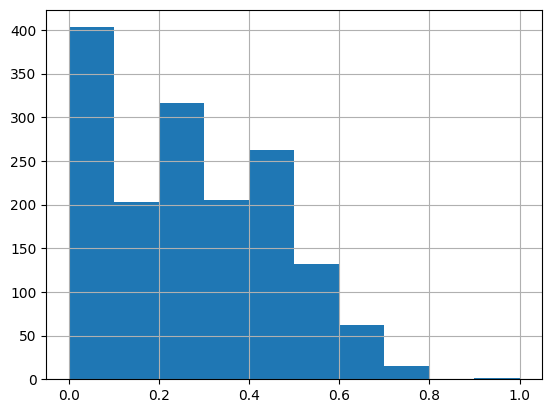

In [35]:
redwine_df['"citric acid"'].hist()

# Question or goal to complete

Go to open data buffalo,   look under "data" and filter down to show only datasets.

Find an interesting looking data set,  find the URL for the dataset and load it into a pandas data frame,  using the URL if
you can.

Some of the URL links load the data in ways that are not compatible with the pd.read_csv function.  If that happens,  download
the data as a CSV and load it that way

Find out the following,  putting each of these in separate cell and adding comments to the notebooks

-the size of the data
-show the head
-use describe() to get some basic statistics
-show the column names
- try to create a histogram of one column,  if you have continuous data in the dataframe


If you have dates in the dataset,  convert that column to the pandas datatime object

                  df['Date'] = df['Date'].astype('datetime64[ns]')

 pandas has member functions for working with dates as distinct type of variable   

In [42]:
url="https://data.buffalony.gov/resource/d6g9-xbgu.csv"

df_crime=pd.read_csv(url)
df_crime.columns = df_art.columns.str.strip()

df_crime.head()

,case_number,incident_datetime,incident_id,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,...,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block
0,16-1660403,2016-06-14T01:20:00.000,NaN,ASSAULT,ASSAULT,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,...,2,2003,55,2,2005,District D,005500,36029005500,360290001102,360290170002003
1,16-3480266,2016-12-13T05:00:00.000,NaN,LARCENY/THEFT,LARCENY/THEFT,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,...,4,4001,23,4,4001,District C,002300,36029002300,360290002004,360290034004001
2,20-2010167,2020-07-19T03:09:00.000,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,3,Sunday,GRIDER ST & KENSINGTON WB,Buffalo,...,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
3,14-3210732,2014-11-17T08:08:00.000,NaN,LARCENY/THEFT,LARCENY/THEFT,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,...,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007
4,15-1100268,2015-04-20T10:22:00.000,NaN,LARCENY/THEFT,LARCENY/THEFT,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,...,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007


In [43]:
# -the size of the data
df_crime.memory_usage()

Index                       128
case_number                8000
incident_datetime          8000
incident_id                8000
incident_type_primary      8000
incident_description       8000
parent_incident_type       8000
hour_of_day                8000
day_of_week                8000
address_1                  8000
city                       8000
state                      8000
location                   8000
latitude                   8000
longitude                  8000
created_at                 8000
updated_at                 8000
zip_code                   8000
neighborhood               8000
council_district           8000
council_district_2011      8000
census_tract               8000
census_block_group         8000
census_block               8000
census_tract_2010          8000
census_block_group_2010    8000
census_block_2010          8000
police_district            8000
tractce20                  8000
geoid20_tract              8000
geoid20_blockgroup         8000
geoid20_

In [44]:
# -show the head
df_crime.head()

,case_number,incident_datetime,incident_id,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,...,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block
0,16-1660403,2016-06-14T01:20:00.000,NaN,ASSAULT,ASSAULT,Assault,1,Tuesday,E AMHERST ST & E AMHERST ST,Buffalo,...,2,2003,55,2,2005,District D,005500,36029005500,360290001102,360290170002003
1,16-3480266,2016-12-13T05:00:00.000,NaN,LARCENY/THEFT,LARCENY/THEFT,Theft,5,Tuesday,1000 Block E LOVEJOY ST,Buffalo,...,4,4001,23,4,4001,District C,002300,36029002300,360290002004,360290034004001
2,20-2010167,2020-07-19T03:09:00.000,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,3,Sunday,GRIDER ST & KENSINGTON WB,Buffalo,...,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
3,14-3210732,2014-11-17T08:08:00.000,NaN,LARCENY/THEFT,LARCENY/THEFT,Theft,8,Monday,2100 Block ELMWOOD AV,Buffalo,...,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007
4,15-1100268,2015-04-20T10:22:00.000,NaN,LARCENY/THEFT,LARCENY/THEFT,Theft,10,Monday,2100 Block ELMWOOD AV,Buffalo,...,2,2007,56,2,2008,District D,005600,36029005600,360290001102,360290163002007


In [46]:
# -use describe() to get some basic statistics
df_crime.describe()

,incident_id,hour_of_day,updated_at
count,0.0,1000.000000,0.0
mean,NaN,9.854000,NaN
std,NaN,6.254423,NaN
min,NaN,0.000000,NaN
25%,NaN,5.000000,NaN
50%,NaN,10.000000,NaN
75%,NaN,13.000000,NaN
max,NaN,23.000000,NaN


In [47]:
# -show the column names
df_crime.columns

Index(['case_number', 'incident_datetime', 'incident_id',
       'incident_type_primary', 'incident_description', 'parent_incident_type',
       'hour_of_day', 'day_of_week', 'address_1', 'city', 'state', 'location',
       'latitude', 'longitude', 'created_at', 'updated_at', 'zip_code',
       'neighborhood', 'council_district', 'council_district_2011',
       'census_tract', 'census_block_group', 'census_block',
       'census_tract_2010', 'census_block_group_2010', 'census_block_2010',
       'police_district', 'tractce20', 'geoid20_tract', 'geoid20_blockgroup',
       'geoid20_block'],
      dtype='object')

<Axes: >

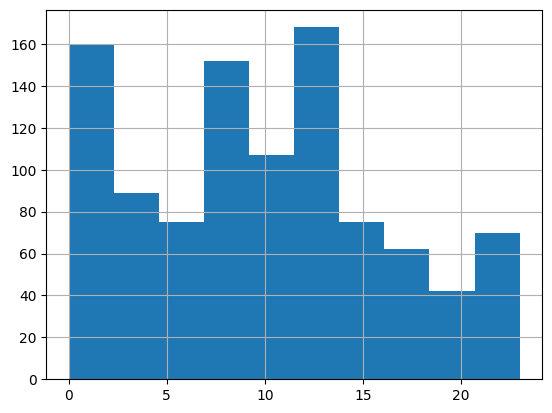

In [48]:
# try to create a histogram of one column, if you have continuous data in the dataframe
df_crime['hour_of_day'].hist()

# Grouping

This allows you to apply the built in operations using a categorical grouping variable

In [51]:
# there is a group by operation available
# note that in the groupy operation, I had to give the full name of the column df_art['type']
# which not what the pandas manual indicates

df_art['title'].groupby(df_art['type']).count()

type
ABSTRACT                  7
ANTIQUE CLOCK             2
ANTIQUE TOOL              1
BAROMETER                 1
BLUE PRINTS               1
BOOK                      2
BUST                      9
CANNONS                   1
DOORS                     1
DRAWING                   6
FIGURATIVE               29
FIGURATIVE AND RELIEF     3
FIGURITIVE                1
FOUNTAIN                  6
FURNITURE                 1
GARMENT                   1
LAMP                      3
LANDSCAPE                 5
LETTER/PHOTOGRAPH         1
LUNETTE MURAL             3
MAP                       5
MURAL                     4
PHOTOGRAPH                2
PLAQUE                   34
PLAQUES                   1
PORTRAIT                 62
RELIEF                   25
TIME CAPSULE              3
URN                       1
VARIOUS                   2
Name: title, dtype: int64

Creating a Pivot Table

In [52]:
table=pd.pivot_table(df_art,values='category',index=['site','type'],columns='city',aggfunc="count")

print(table)

city                             BUFFALO
site                type                
1308 CITY HALL      BLUE PRINTS        1
                    BOOK               1
1417 CITY HALL      ABSTRACT           3
                    LANDSCAPE          3
                    PHOTOGRAPH         2
...                                  ...
SYMPHONY CIRCLE     LAMP               1
TONY SISTI PARK     ABSTRACT           2
TURNER PARKING RAMP PLAQUE             1
TYLER PARK          PLAQUE             1
WILLERT PARK        RELIEF             1

[112 rows x 1 columns]


In [53]:
df_art.columns

Index(['title', 'category', 'type', 'medium', 'frame', 'photo_url_link',
       'artist', 'contractor', 'founder', 'architect', 'carver', 'designer',
       'date', 'object_height_in', 'object_width_in', 'object_depth_in',
       'object_diameter_in', 'base_height_in', 'base_width_in',
       'base_depth_in', 'base_diameter_in', 'plaque_inscription', 'site',
       'street_address', 'city', 'zip_code', 'state', 'latitude', 'longitude',
       'geocoded_column'],
      dtype='object')

# Question or goal

Figure out how to create a Pivot table using the data you downloaded from Open Data Buffalo

Look for categories, and use the count option

In [54]:
df_crime.columns

Index(['case_number', 'incident_datetime', 'incident_id',
       'incident_type_primary', 'incident_description', 'parent_incident_type',
       'hour_of_day', 'day_of_week', 'address_1', 'city', 'state', 'location',
       'latitude', 'longitude', 'created_at', 'updated_at', 'zip_code',
       'neighborhood', 'council_district', 'council_district_2011',
       'census_tract', 'census_block_group', 'census_block',
       'census_tract_2010', 'census_block_group_2010', 'census_block_2010',
       'police_district', 'tractce20', 'geoid20_tract', 'geoid20_blockgroup',
       'geoid20_block'],
      dtype='object')

In [56]:
pd.pivot_table(df_crime,values='case_number',index=['neighborhood','incident_type_primary'],columns='police_district',aggfunc="count")


police_district                     District A  District B  District C  \
neighborhood incident_type_primary                                       
Allentown    ASSAULT                       NaN         2.0         NaN   
             BURGLARY                      NaN         2.0         NaN   
             LARCENY/THEFT                 NaN        12.0         NaN   
Black Rock   ASSAULT                       NaN         NaN         NaN   
             BURGLARY                      NaN         NaN         NaN   
...                                        ...         ...         ...   
West Side    ASSAULT                       NaN         3.0         NaN   
             BURGLARY                      NaN         8.0         NaN   
             LARCENY/THEFT                 NaN         9.0         NaN   
             ROBBERY                       NaN         1.0         NaN   
             UUV                           NaN         3.0         NaN   

police_district                     District D  District E  UNKNOWN  
neighborhood incident_type_primary                                   
Allentown    ASSAULT                       NaN         NaN      NaN  
             BURGLARY                      NaN         NaN      NaN  
             LARCENY/THEFT                 NaN         NaN      NaN  
Black Rock   ASSAULT                       2.0         NaN      NaN  
             BURGLARY                      3.0         NaN      NaN  
...                                        ...         ...      ...  
West Side    ASSAULT                       NaN         NaN      NaN  
             BURGLARY                      NaN         NaN      NaN  
             LARCENY/THEFT                 NaN         NaN      NaN  
             ROBBERY                       NaN         NaN      NaN  
             UUV                           NaN         NaN      NaN  

[175 rows x 6 columns]

# Melting a data frame

Converts a "wide format" data frame into a "long format" data frame

In a long format data frame,  we have 1 or more identifier columns,  here I used title as the identifier- think of this
like a data base index.   Note, you can have a composite index of more than one column

The other two columns are the name of the variable followed by the value

So the "melted form" is always  index, variable, value

Some types of operations are easily carried out on the melted or long form of a dataframe

I've figured out some cool plotting tactics, but other than that I don't use this form much.  I should learn to do that
more effectively.

In [57]:
temp=pd.melt(df_art,id_vars=['title'],value_vars=['category','type','photo_url_link','latitude','longitude'])
temp.head(10)

,title,variable,value
0,SOLE PARK,category,SCULPTURE
1,BUFFALO STREET MAP,category,GRAPHIC ARTS
2,WAR MEMORIAL STADIUM RENDERING,category,GRAPHIC ARTS
3,MAYOR HIRAM BARTON,category,PAINTINGS
4,MAYOR ELI COOK,category,GRAPHICS ARTS
5,MAYOR ANTHONY MASIELLO,category,PAINTINGS
6,MAYOR CHANDLER J WELLS,category,PAINTINGS
7,MCMILLAN FOUNTAIN,category,DECORATIVE OBJECTS
8,SESQUICENTENNIAL TIME CAPSULE,category,DECORATIVE OBJECTS
9,ISOCHRONIC MOUNTAIN BUFFALO,category,SCULPTURE


In [58]:
temp.tail(10)

,title,variable,value
1110,MAYOR ALEXANDER BRUSH,longitude,-78.879354
1111,MAYOR SOLOMON SCHEU,longitude,-78.879354
1112,WILLIAM L MARCY JR,longitude,-78.873155
1113,SURVEY RULER,longitude,-78.879354
1114,FRANK CALLAHAN MEMORIAL,longitude,-78.810073
1115,CHRISTOPHER COLUMBUS,longitude,-78.89306
1116,BUFFALO STREET MAP,longitude,-78.879354
1117,POLISH-AMERICAN VETERANS MEMORIAL,longitude,-78.880826
1118,THE BATTLE WITHIN,longitude,-78.881144
1119,CORONATION DAY,longitude,-78.87959


#  Question- Create a melt of your data set, with a couple of variables included

What variable or variables will you need in your index.  Do you need a composite index?

Bonus- how could you make use of this melted version of the data?   I've used melted data to produce some interesting plots, but it's tough to think of other uses

In [ ]:
# What variable or variables will you need in your index?
# We need Categorical variables the example below shows latitude and longitude being converted into strings

In [59]:
df_crime.columns

Index(['case_number', 'incident_datetime', 'incident_id',
       'incident_type_primary', 'incident_description', 'parent_incident_type',
       'hour_of_day', 'day_of_week', 'address_1', 'city', 'state', 'location',
       'latitude', 'longitude', 'created_at', 'updated_at', 'zip_code',
       'neighborhood', 'council_district', 'council_district_2011',
       'census_tract', 'census_block_group', 'census_block',
       'census_tract_2010', 'census_block_group_2010', 'census_block_2010',
       'police_district', 'tractce20', 'geoid20_tract', 'geoid20_blockgroup',
       'geoid20_block'],
      dtype='object')

In [66]:
temp=pd.melt(df_crime,id_vars=['parent_incident_type'],value_vars=['latitude','longitude'])
temp.head(10), temp.tail(10)

(  parent_incident_type  variable    value
 0              Assault  latitude   42.938
 1                Theft  latitude   42.889
 2              Assault  latitude  UNKNOWN
 3                Theft  latitude   42.954
 4                Theft  latitude   42.954
 5  Breaking & Entering  latitude   42.913
 6                Theft  latitude  UNKNOWN
 7              Assault  latitude   42.891
 8                Theft  latitude  UNKNOWN
 9                Theft  latitude   42.882,
      parent_incident_type   variable    value
 1990                Theft  longitude  -78.814
 1991                Theft  longitude  -78.891
 1992                Theft  longitude   -78.85
 1993                Theft  longitude  UNKNOWN
 1994                Theft  longitude  -78.873
 1995              Assault  longitude  -78.805
 1996  Breaking & Entering  longitude  -78.893
 1997  Breaking & Entering  longitude    -78.8
 1998                Theft  longitude  UNKNOWN
 1999     Theft of Vehicle  longitude  -78.832)

<Axes: >

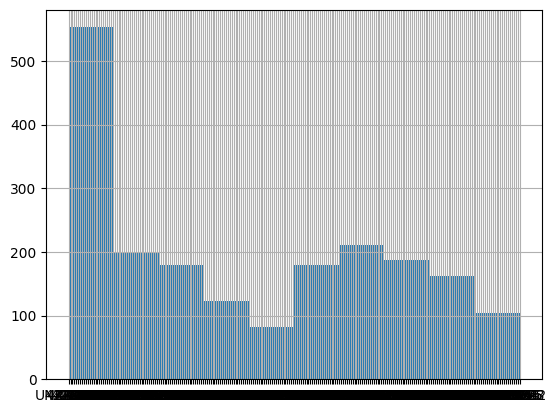

In [65]:
temp['value'].hist()

# Slicing and accessing sections of a data frame

In [67]:
# create an example frame from a dictionary

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
t_frame = pd.DataFrame(data)

In [68]:
t_frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [69]:
# accessing colums, two forms

print(t_frame['state'])
print("--------------------------")

print(t_frame.state)

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object
--------------------------
0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object


In [70]:
# there is also a loc attribute that can pull rows

t_frame.loc[3]

state    Nevada
year       2001
pop         2.4
Name: 3, dtype: object

In [71]:
t_frame.loc[2:3]

,state,year,pop
2,Ohio,2002,3.6
3,Nevada,2001,2.4


In [72]:
# we can add columns by assignment
t_frame['debt'] =-1

Look at t_frame after the debt term was added,  what has happened?   Can you figure out how to set debt to a set of different
random values (1 per state)


In [74]:
t_frame.head()

,state,year,pop,debt,eastern
0,Ohio,2000,1.5,-1,True
1,Ohio,2001,1.7,-1,True
2,Ohio,2002,3.6,-1,True
3,Nevada,2001,2.4,-1,False
4,Nevada,2002,2.9,-1,False


In [75]:
# Add a boolean column to t-frame identifying eastern states

t_frame['eastern']= (t_frame.state=="Ohio")

t_frame

,state,year,pop,debt,eastern
0,Ohio,2000,1.5,-1,True
1,Ohio,2001,1.7,-1,True
2,Ohio,2002,3.6,-1,True
3,Nevada,2001,2.4,-1,False
4,Nevada,2002,2.9,-1,False
5,Nevada,2003,3.2,-1,False


In [76]:
# we can use the del method to remove a column

del t_frame['eastern']

t_frame.columns

Index(['state', 'year', 'pop', 'debt'], dtype='object')

In [78]:
# Reindexing- changeing the order of columns or rows

a=pd.Series([4.5,7.2,-5.3,3.6], index=['d','b','a','c'])
a

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [79]:
a2=a.reindex(['a','b','c','d'])
a2

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64

In [80]:
# reordering a data frame

frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [81]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

# note the insertion of the blank row for b,  NaN means not a number

frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [82]:
# reordering columns,  using the columns keyword

states = ['Texas', 'Utah', 'California']

frame.reindex(columns=states)



,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


It's not obvious to me what the point of reindexing is,  I guess you could clean up the appearance of dataframes
for output?  Any ideas?

In [83]:
# Dropping elements

data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [84]:
data.drop(['Ohio','Colorado'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [85]:
data.drop(['two','four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [86]:
# Indexing with integers- works like standard numpy or python index- note the need to use iloc()

data.iloc[0,0]

0

In [87]:
data.iloc[0:2,]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [88]:
#loc uses the column and row names

data.loc[["Colorado","Utah"],"three"]

Colorado     6
Utah        10
Name: three, dtype: int64

# Question/activity

Show several slices of your data frame,   using column names and integer locations

Explain what is happening in the slice

In [89]:
df_crime.columns

Index(['case_number', 'incident_datetime', 'incident_id',
       'incident_type_primary', 'incident_description', 'parent_incident_type',
       'hour_of_day', 'day_of_week', 'address_1', 'city', 'state', 'location',
       'latitude', 'longitude', 'created_at', 'updated_at', 'zip_code',
       'neighborhood', 'council_district', 'council_district_2011',
       'census_tract', 'census_block_group', 'census_block',
       'census_tract_2010', 'census_block_group_2010', 'census_block_2010',
       'police_district', 'tractce20', 'geoid20_tract', 'geoid20_blockgroup',
       'geoid20_block'],
      dtype='object')

In [92]:
df_crime.loc[0:4, 'case_number']
# This return the first 5 case numbers

0    16-1660403
1    16-3480266
2    20-2010167
3    14-3210732
4    15-1100268
Name: case_number, dtype: object

# Function Application and Mapping

Mapping refers to applying functions across a data structure

The numpy methods also work on Pandas data frames

In [93]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-1.096426,1.069306,-0.534619
Ohio,1.784414,-0.135237,-1.338449
Texas,0.827839,-0.277743,0.335988
Oregon,2.282372,0.147743,1.064501


In [94]:
# applying a lambda function to the columns of an array
# a lambda function is one defined in a single line

f=lambda x: x.max()-x.min()

# the default apply() is by column,   as per the R apply() function

frame.apply(f)

b    3.378798
d    1.347049
e    2.402950
dtype: float64

In [95]:
# we can also use apply() across rows instead of columns

frame.apply(f,axis="columns")

Utah      2.165731
Ohio      3.122863
Texas     1.105583
Oregon    2.134629
dtype: float64

Note that there are a number of member functions, which don't require the use of apply(),   frame.mean(), max, min, sum
etc

use dir(frame) to see what is availabe.

There is a version of apply called applymap() that acts on each element in the data frame

In [96]:
mysquare= lambda x: x**2

frame.applymap(mysquare)

,b,d,e
Utah,1.202149,1.143415,0.285818
Ohio,3.184133,0.018289,1.791446
Texas,0.685318,0.077141,0.112888
Oregon,5.209222,0.021828,1.133163


In [ ]:
# Sorting and Ranking

In [97]:
# sorting by index

tseries = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

tseries.sort_index()


a    1
b    2
c    3
d    0
dtype: int64

In [98]:
tframe = pd.DataFrame(np.arange(8).reshape((2, 4)),index=['three', 'one'],columns=['d', 'a', 'b', 'c'])
tframe

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [99]:
# sort by row
tframe.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [100]:
# sort by column

tframe.sort_index(axis='columns')

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [101]:
# sort by values,  rather than by indices
tframe.sort_values(by="b")

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


#Question

produce a version of your data set from open data buffalo,  sorted by one of the columns

Figure out how to create a reversed or backwards sorted version of the data frame as well

In [102]:
df_crime.columns

Index(['case_number', 'incident_datetime', 'incident_id',
       'incident_type_primary', 'incident_description', 'parent_incident_type',
       'hour_of_day', 'day_of_week', 'address_1', 'city', 'state', 'location',
       'latitude', 'longitude', 'created_at', 'updated_at', 'zip_code',
       'neighborhood', 'council_district', 'council_district_2011',
       'census_tract', 'census_block_group', 'census_block',
       'census_tract_2010', 'census_block_group_2010', 'census_block_2010',
       'police_district', 'tractce20', 'geoid20_tract', 'geoid20_blockgroup',
       'geoid20_block'],
      dtype='object')

In [104]:
df_crime.sort_values(by="case_number")

,case_number,incident_datetime,incident_id,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,...,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block
838,06-0180851,2006-01-18T17:01:00.000,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,17,Wednesday,1 Block DELAWARE AV,Buffalo,...,1,1040,165,1,1068,District B,016500,36029016500,360290001101,360290165001040
846,06-0210815,2006-01-22T16:00:00.000,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,16,Sunday,300 Block JEWETT AV,Buffalo,...,2,2005,40.01,2,2004,District E,004003,36029004003,360290001102,360290011002005
597,06-0240298,2006-01-23T15:00:00.000,NaN,BURGLARY,Buffalo Police are investigating this report o...,Breaking & Entering,15,Monday,100 Block HERTEL AV,Buffalo,...,2,2000,59,2,2000,District D,005900,36029005900,360290001102,360290046012000
688,06-0290181,2006-01-28T22:00:00.000,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,22,Saturday,1000 Block ELMWOOD AV,Buffalo,...,3,3002,63.02,3,3005,District D,006302,36029006302,360290001103,360290071043002
673,06-0410814,2006-02-10T03:55:00.000,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,3,Friday,100 Block HIGH ST,Buffalo,...,4,4010,31,4,4008,District B,003100,36029003100,360290002004,360290031004010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,23-3510596,2023-12-17T16:02:33.000,NaN,UUV,Buffalo Police are investigating this report o...,Theft of Vehicle,16,Sunday,400 Block WOODLAWN AV,Buffalo,...,3,3001,33.02,3,3001,District C,003302,36029003302,360290033023,360290033023001
596,23-3580170,2023-12-24T04:30:00.000,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,5,Sunday,1200 Block WEST AV,Buffalo,...,1,1015,171,1,1018,District D,017100,36029017100,360290171001,360290171001015
577,23-3620327,2023-12-28T10:16:00.000,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,10,Thursday,500 Block GENESEE ST,Buffalo,...,3,3000,25.02,2,2000,District B,002502,36029002502,360290025023,360290025023000
531,23-3620859,2023-10-28T14:55:00.000,NaN,UUV,Buffalo Police are investigating this report o...,Theft of Vehicle,18,Thursday,1000 Block HUMBOLDT PW,Buffalo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df_crime.sort_values(by="case_number",ascending = False)

,case_number,incident_datetime,incident_id,incident_type_primary,incident_description,parent_incident_type,hour_of_day,day_of_week,address_1,city,...,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,police_district,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block
754,23-3630807,2023-10-12T12:00:00.000,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,18,Friday,0 Block GRANGER PL,Buffalo,...,1,1006,63.02,1,1011,District D,006302,36029006302,360290063021,360290063021006
531,23-3620859,2023-10-28T14:55:00.000,NaN,UUV,Buffalo Police are investigating this report o...,Theft of Vehicle,18,Thursday,1000 Block HUMBOLDT PW,Buffalo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,23-3620327,2023-12-28T10:16:00.000,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,10,Thursday,500 Block GENESEE ST,Buffalo,...,3,3000,25.02,2,2000,District B,002502,36029002502,360290025023,360290025023000
596,23-3580170,2023-12-24T04:30:00.000,NaN,ASSAULT,Buffalo Police are investigating this report o...,Assault,5,Sunday,1200 Block WEST AV,Buffalo,...,1,1015,171,1,1018,District D,017100,36029017100,360290171001,360290171001015
835,23-3510596,2023-12-17T16:02:33.000,NaN,UUV,Buffalo Police are investigating this report o...,Theft of Vehicle,16,Sunday,400 Block WOODLAWN AV,Buffalo,...,3,3001,33.02,3,3001,District C,003302,36029003302,360290033023,360290033023001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,06-0410814,2006-02-10T03:55:00.000,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,3,Friday,100 Block HIGH ST,Buffalo,...,4,4010,31,4,4008,District B,003100,36029003100,360290002004,360290031004010
688,06-0290181,2006-01-28T22:00:00.000,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,22,Saturday,1000 Block ELMWOOD AV,Buffalo,...,3,3002,63.02,3,3005,District D,006302,36029006302,360290001103,360290071043002
597,06-0240298,2006-01-23T15:00:00.000,NaN,BURGLARY,Buffalo Police are investigating this report o...,Breaking & Entering,15,Monday,100 Block HERTEL AV,Buffalo,...,2,2000,59,2,2000,District D,005900,36029005900,360290001102,360290046012000
846,06-0210815,2006-01-22T16:00:00.000,NaN,LARCENY/THEFT,Buffalo Police are investigating this report o...,Theft,16,Sunday,300 Block JEWETT AV,Buffalo,...,2,2005,40.01,2,2004,District E,004003,36029004003,360290001102,360290011002005
